Lets start with some questions
1. Is the price fluctuating too much or is it steady?
    What was the average price in last 5 years? What was the min and Max price? or What was the change in price of the stock over time?

2. Can the price of one stock affect the other one? or What was the correlation between different stocks?
3. What was the daily return of the stock on average?
4. What was the moving average of the various stocks?
5. How much value do we put at risk by investing in a particular stock?
6. How can we attempt to predict future stock behavior? (Predicting the closing price stock price of APPLE inc using LSTM)

##### Some fundamental questions to explore later.
- What are the features affecting the price?
- What happened at the time of Min and Max?

## Notebook setup

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
sns.set_style('whitegrid')
plt.style.use("fivethirtyeight")
%matplotlib inline

## Getting the data
From Yahoo Finance website

In [6]:
!pip install pandas-datareader

  Obtaining dependency information for pandas-datareader from https://files.pythonhosted.org/packages/3f/16/56c9d648b503619ebe96f726b5f642b68e299b34162ed2d6faa9d7966b7d/pandas_datareader-0.10.0-py3-none-any.whl.metadata
   ---------------------------------------- 0.0/109.5 kB ? eta -:--:--
   -------------- ------------------------ 41.0/109.5 kB 991.0 kB/s eta 0:00:01
   ---------------------------------------- 109.5/109.5 kB 1.6 MB/s eta 0:00:00


In [8]:
!pip install yfinance

  Obtaining dependency information for yfinance from https://files.pythonhosted.org/packages/7d/76/31fb9c58398f4cbdde4a0831d0407a1ca987fe828c7da9ce80969014a5a1/yfinance-0.2.40-py2.py3-none-any.whl.metadata
  Obtaining dependency information for multitasking>=0.0.7 from https://files.pythonhosted.org/packages/3e/8a/bb3160e76e844db9e69a413f055818969c8acade64e1a9ac5ce9dfdcf6c1/multitasking-0.0.11-py3-none-any.whl.metadata
  Obtaining dependency information for frozendict>=2.3.4 from https://files.pythonhosted.org/packages/6a/71/3656c00606e75e81f11721e6a1c973c3e03da8c7d8b665d20f78245384c6/frozendict-2.4.4-py311-none-any.whl.metadata
     ---------------------------------------- 0.0/3.0 MB ? eta -:--:--
     ---- ----------------------------------- 0.3/3.0 MB 9.0 MB/s eta 0:00:01
     -------- ------------------------------- 0.6/3.0 MB 7.6 MB/s eta 0:00:01
     ------------ --------------------------- 0.9/3.0 MB 7.4 MB/s eta 0:00:01
     ---------------- ----------------------- 1.2/3.0 MB 7

In [3]:
# Read stock data from yahoo
from pandas_datareader.data import DataReader
import yfinance as yf
from pandas_datareader import data as pdr

yf.pdr_override()

# For time stamps nvidia 
from datetime import datetime

yfinance: pandas_datareader support is deprecated & semi-broken so will be removed in a future verison. Just use yfinance.


In [12]:
# The tech stocks will be used for this analysis
tech_list = ['AAPL', 'GOOG', 'NVDA', 'AMZN']

# Set up End and Start times for data grab
end = datetime.now()
start = datetime(end.year - 1, end.month, end.day)

for stock in tech_list:
    globals()[stock] = yf.download(stock, start, end)
    

company_list = [AAPL, GOOG, NVDA, AMZN]
company_name = ["APPLE", "GOOGLE", "NVIDIA", "AMAZON"]

for company, com_name in zip(company_list, company_name):
    company["company_name"] = com_name
    
df = pd.concat(company_list, axis=0)
df.tail(10)

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume,company_name
Date,,,,,,,
2024-05-20,184.339996,186.669998,183.279999,183.539993,183.539993,30511800,AMAZON
2024-05-21,182.300003,183.259995,180.750000,183.149994,183.149994,50839100,AMAZON
2024-05-22,183.880005,185.220001,181.970001,183.130005,183.130005,28148800,AMAZON
2024-05-23,183.660004,184.759995,180.080002,181.050003,181.050003,33670200,AMAZON
2024-05-24,181.649994,182.440002,180.300003,180.750000,180.750000,27434100,AMAZON
2024-05-28,179.929993,182.240005,179.490005,182.149994,182.149994,29927000,AMAZON
2024-05-29,181.699997,184.080002,181.550003,182.020004,182.020004,32009300,AMAZON
2024-05-30,181.309998,181.339996,178.360001,179.320007,179.320007,29249200,AMAZON
2024-05-31,178.300003,179.210007,173.869995,176.440002,176.440002,58861600,AMAZON


Data at the first glance: it's numeric and weekends are missing.

## Descriptive Statistics about the Data

In [13]:
# Summary Stats
AAPL.describe()

,Open,High,Low,Close,Adj Close,Volume
count,251.000000,251.000000,251.000000,251.000000,251.000000,2.510000e+02
mean,182.439522,183.918805,181.048088,182.508924,181.964367,5.805212e+07
std,8.555558,8.375485,8.566671,8.515432,8.451674,1.866303e+07
min,165.350006,166.399994,164.080002,165.000000,164.776505,2.404830e+07
25%,175.244995,177.025002,173.660004,175.280006,174.800789,4.678545e+07
50%,182.630005,184.490005,181.449997,182.889999,182.341629,5.306800e+07
75%,189.864998,191.065002,188.919998,189.854996,189.502174,6.486690e+07
max,198.020004,199.619995,197.000000,198.110001,197.589523,1.632241e+08


Only 251 data in one year, because weekends are not included = 52*2= 104 365-104= 261 there are other days like 27 May that is Monday but not included.

In [14]:
# General info
AAPL.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 251 entries, 2023-06-05 to 2024-06-03
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Open          251 non-null    float64
 1   High          251 non-null    float64
 2   Low           251 non-null    float64
 3   Close         251 non-null    float64
 4   Adj Close     251 non-null    float64
 5   Volume        251 non-null    int64  
 6   company_name  251 non-null    object 
dtypes: float64(5), int64(1), object(1)
memory usage: 15.7+ KB


## 1. What was the change in price of the stock over time

#### Closing Price
The closing price is the last price at which the stock is traded during the regular trading day. A stock’s closing price is the standard benchmark used by investors to track its performance over time.

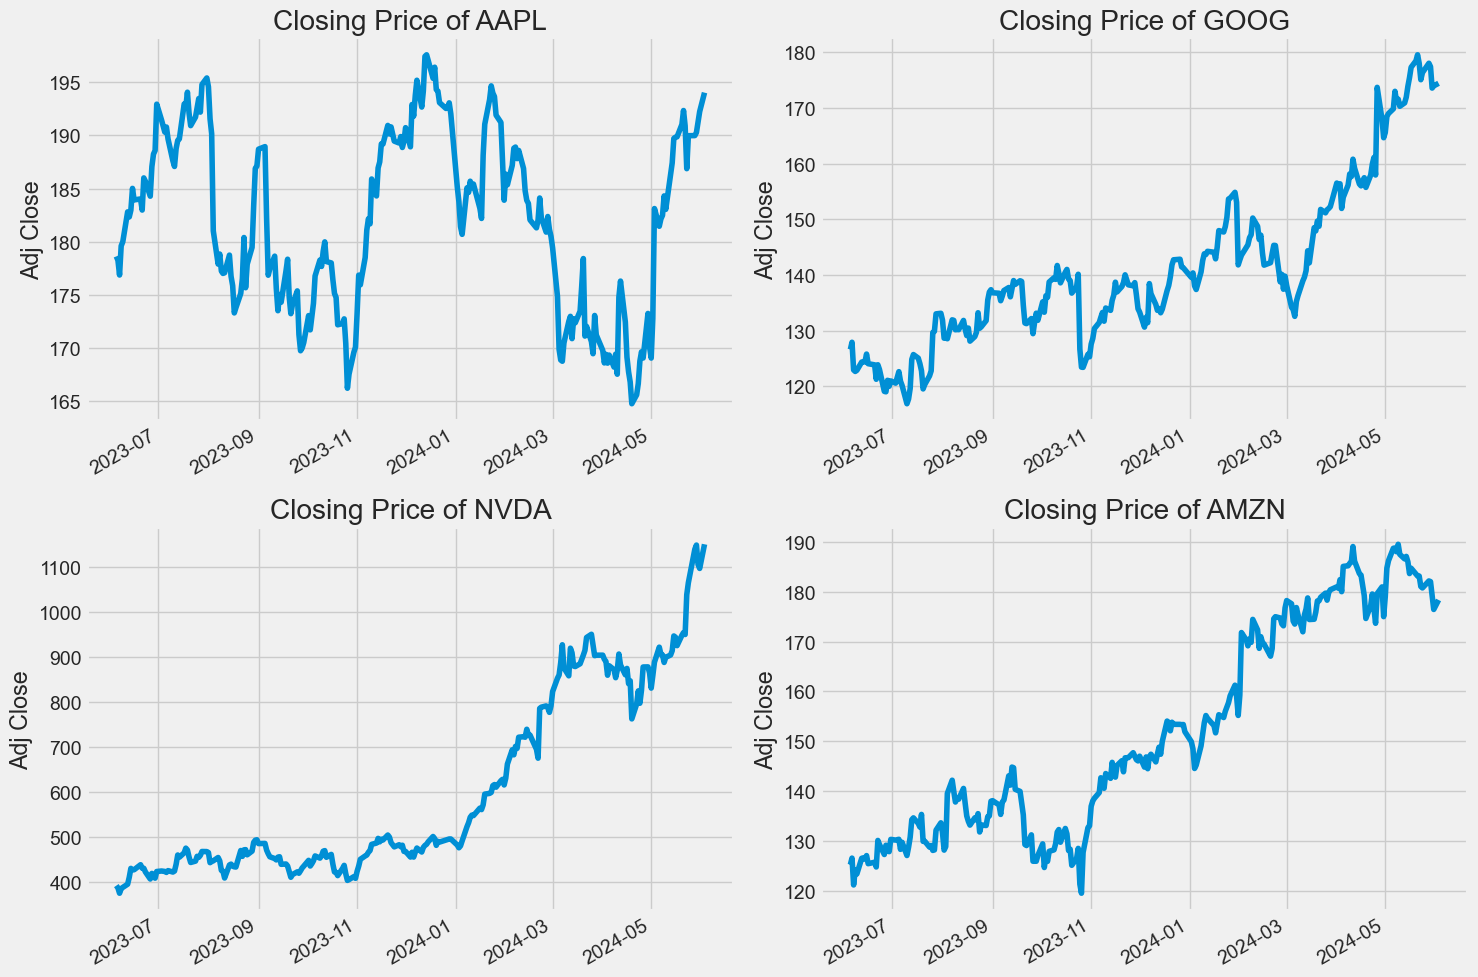

In [15]:
# Let's see a historical view of the closing price
plt.figure(figsize=(15, 10))
plt.subplots_adjust(top=1.25, bottom=1.2)

for i, company in enumerate(company_list, 1):
    plt.subplot(2, 2, i)
    company['Adj Close'].plot()
    plt.ylabel('Adj Close')
    plt.xlabel(None)
    plt.title(f"Closing Price of {tech_list[i - 1]}")
    
plt.tight_layout()

#### Volume of Sales
Volume is the amount of an asset or security that changes hands over some period of time, often over the course of a day. For instance, the stock trading volume would refer to the number of shares of security traded between its daily open and close. Trading volume, and changes to volume over the course of time, are important inputs for technical traders.

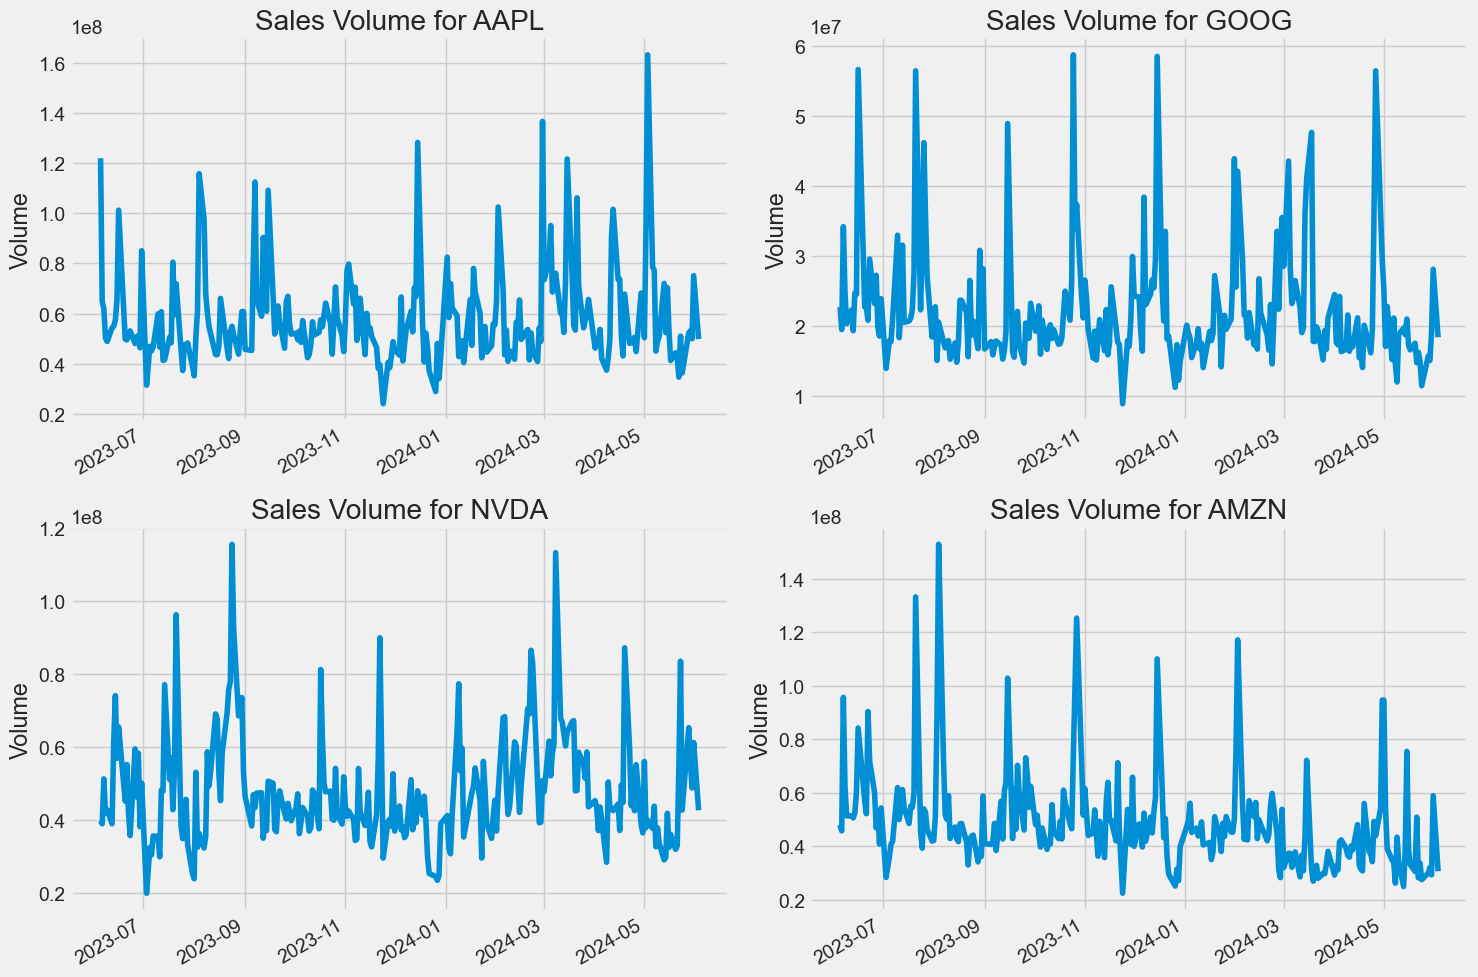

In [19]:
# Now let's plot the total volume of stock being traded each day
plt.figure(figsize=(15, 10))
plt.subplots_adjust(top=1.25, bottom=1.2)

for i, company in enumerate(company_list, 1):
    plt.subplot(2, 2, i)
    company['Volume'].plot()
    plt.ylabel('Volume')
    plt.xlabel(None)
    plt.title(f"Sales Volume for {tech_list[i - 1]}")
    
plt.tight_layout()

### 2. What was the moving average of the various stocks?

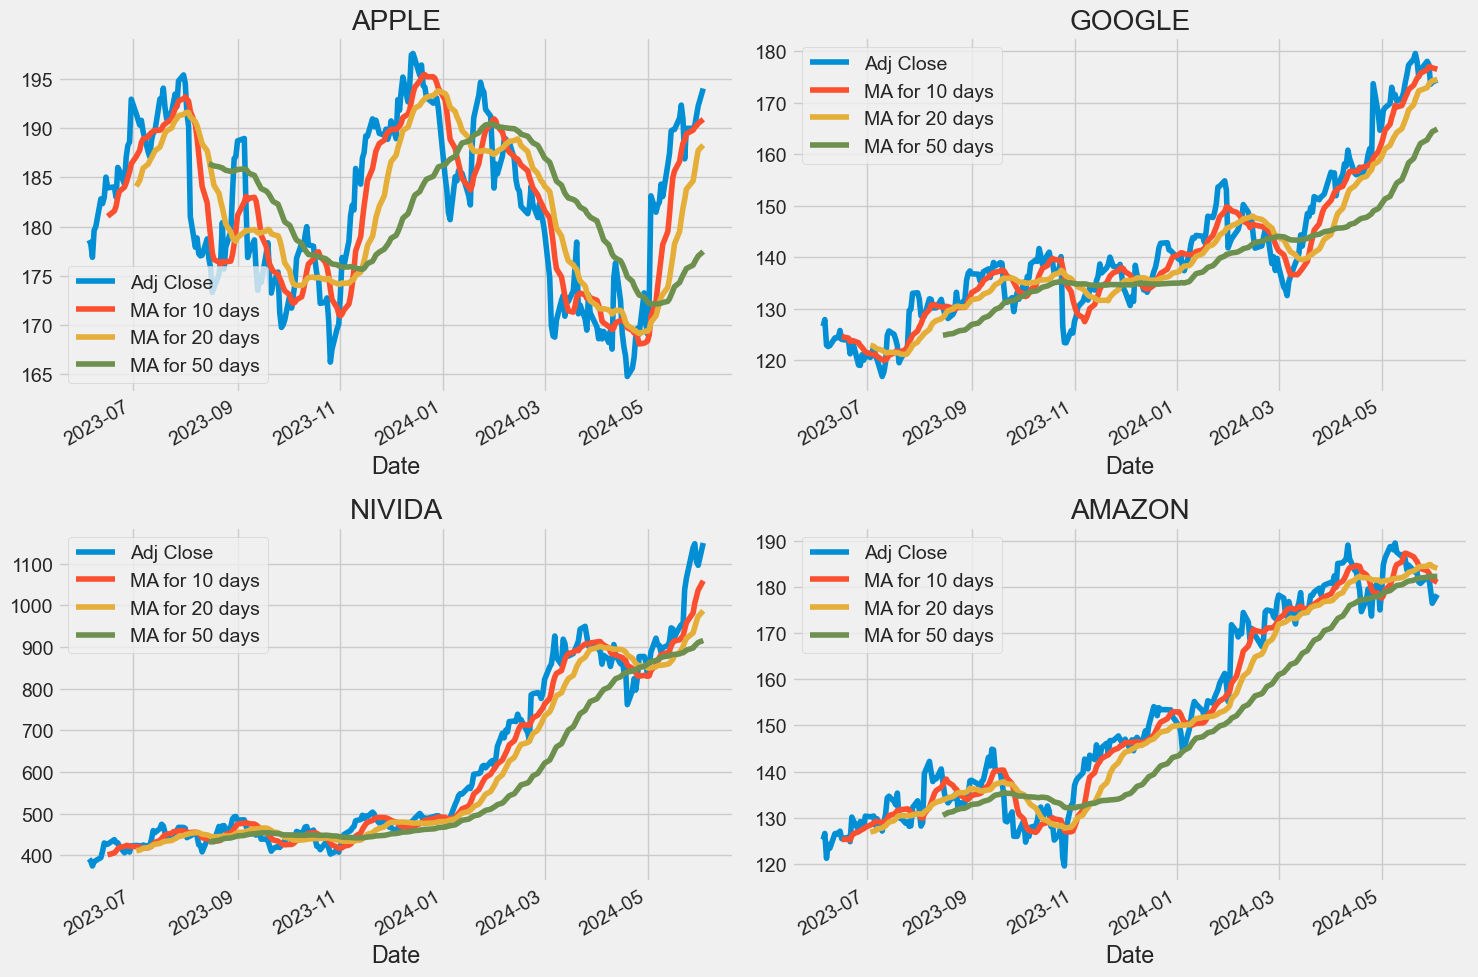

In [21]:
ma_day = [10, 20, 50]

for ma in ma_day:
    for company in company_list:
        column_name = f"MA for {ma} days"
        company[column_name] = company['Adj Close'].rolling(ma).mean()
        

fig, axes = plt.subplots(nrows=2, ncols=2)
fig.set_figheight(10)
fig.set_figwidth(15)

AAPL[['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[0,0])
axes[0,0].set_title('APPLE')

GOOG[['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[0,1])
axes[0,1].set_title('GOOGLE')

NVDA[['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[1,0])
axes[1,0].set_title('NIVIDA')

AMZN[['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[1,1])
axes[1,1].set_title('AMAZON')

fig.tight_layout()

We see in the graph that the best values to measure the moving average are 10 and 20 days because we still capture trends in the data without noise.

### 3. What was the daily return of the stock on average?
We're now going to analyze the risk of the stock. In order to do so we'll need to take a closer look at the daily changes of the stock, and not just its absolute value. Let's go ahead and use pandas to retrieve the daily returns for the NIVIDA stock.

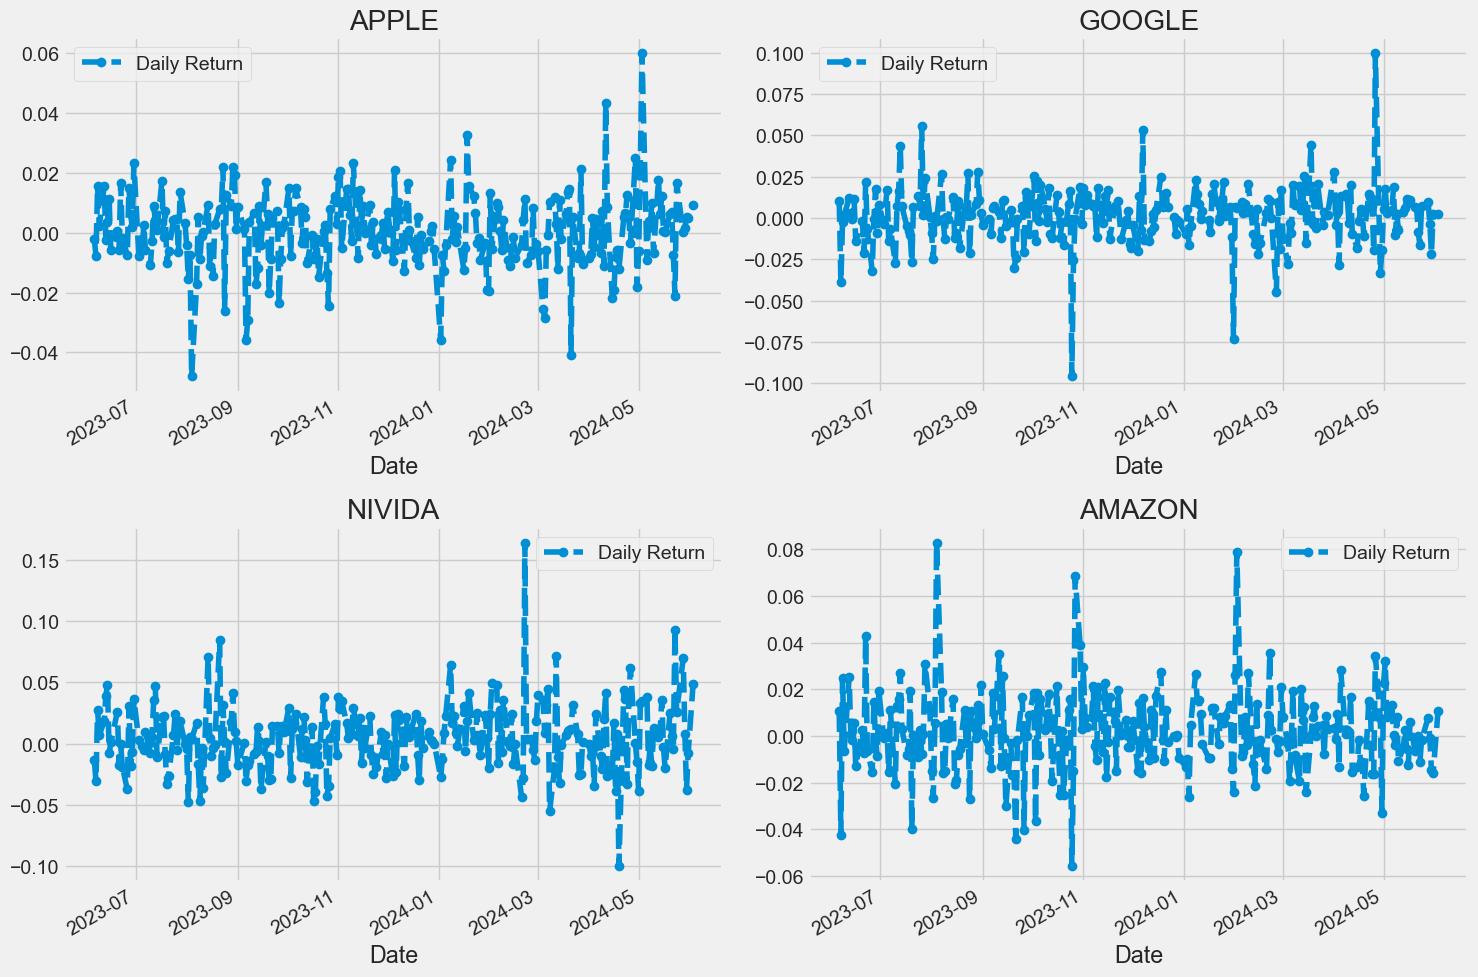

In [23]:
# We'll use pct_change to find the percent change for each day
for company in company_list:
    company['Daily Return'] = company['Adj Close'].pct_change()

# Then we'll plot the daily return percentage
fig, axes = plt.subplots(nrows=2, ncols=2)
fig.set_figheight(10)
fig.set_figwidth(15)

AAPL['Daily Return'].plot(ax=axes[0,0], legend=True, linestyle='--', marker='o')
axes[0,0].set_title('APPLE')

GOOG['Daily Return'].plot(ax=axes[0,1], legend=True, linestyle='--', marker='o')
axes[0,1].set_title('GOOGLE')

NVDA['Daily Return'].plot(ax=axes[1,0], legend=True, linestyle='--', marker='o')
axes[1,0].set_title('NIVIDA')

AMZN['Daily Return'].plot(ax=axes[1,1], legend=True, linestyle='--', marker='o')
axes[1,1].set_title('AMAZON')

fig.tight_layout()

It displays that NIVIDA has the less ups and downs in a day except for some days but Apple is not steady.

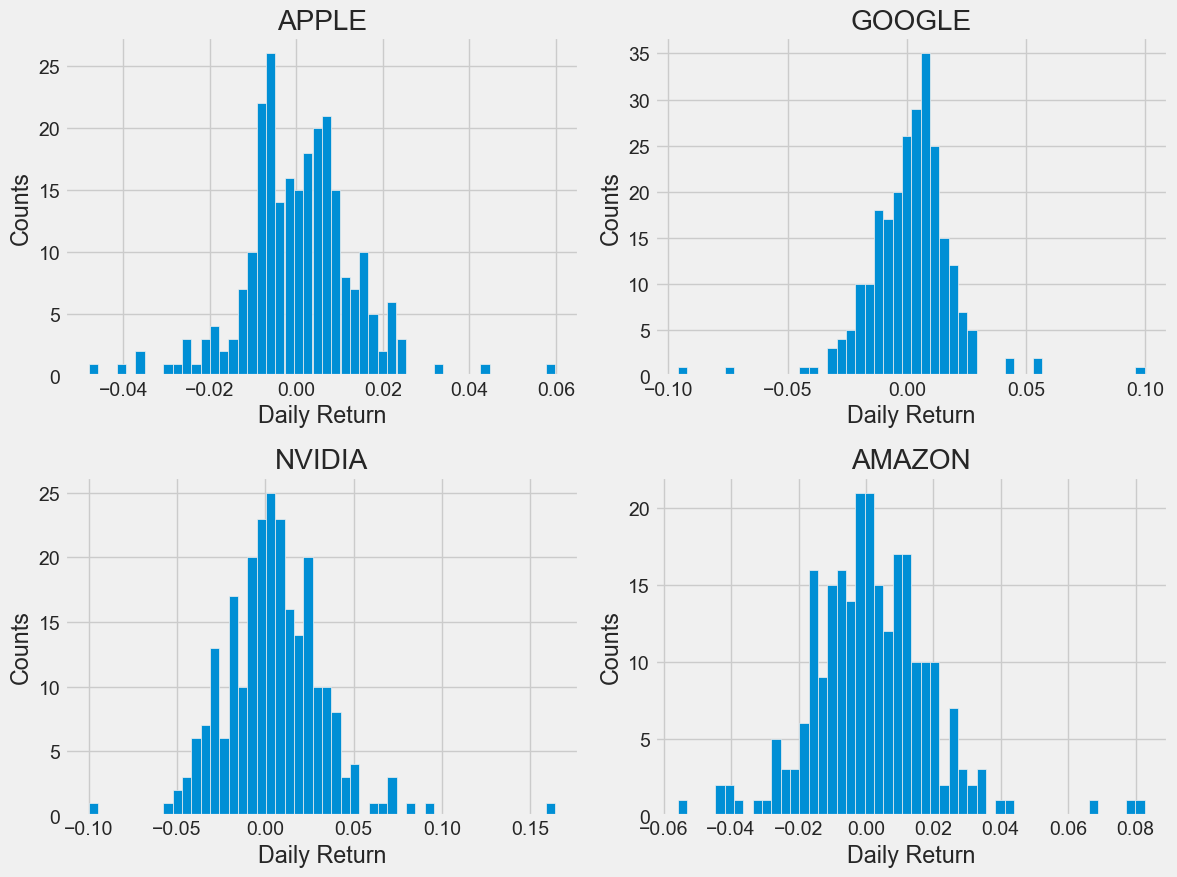

In [24]:
#An overall look at the average daily return using a histogram.
plt.figure(figsize=(12, 9))

for i, company in enumerate(company_list, 1):
    plt.subplot(2, 2, i)
    company['Daily Return'].hist(bins=50)
    plt.xlabel('Daily Return')
    plt.ylabel('Counts')
    plt.title(f'{company_name[i - 1]}')
    
plt.tight_layout()

In [25]:
# Calculate the portion of daily returns over and under 0
for company, com_name in zip(company_list, company_name):
    positive_returns = company[company['Daily Return'] > 0].shape[0]
    negative_returns = company[company['Daily Return'] < 0].shape[0]
    total_returns = company['Daily Return'].shape[0]
    
    positive_proportion = positive_returns / total_returns
    negative_proportion = negative_returns / total_returns
    
    print(f"{com_name} - Positive Returns: {positive_proportion:.2f}, Negative Returns: {negative_proportion:.2f}")

APPLE - Positive Returns: 0.53, Negative Returns: 0.47
GOOGLE - Positive Returns: 0.57, Negative Returns: 0.43
NVIDIA - Positive Returns: 0.57, Negative Returns: 0.42
AMAZON - Positive Returns: 0.51, Negative Returns: 0.47


The distributions show that NIVIDA and Google are returning more possitive values, but Apple and Amazon are more around negative retunes. 

### 4. What was the correlation between different stocks closing prices?
Correlation is a statistic that measures the degree to which two variables move in relation to each other which has a value that must fall between -1.0 and +1.0. Correlation measures association, but doesn’t show if x causes y or vice versa — or if the association is caused by a third factor[1].

Now what if we wanted to analyze the returns of all the stocks in our list? Let's go ahead and build a DataFrame with all the ['Close'] columns for each of the stocks dataframes.


In [26]:
# Grab all the closing prices for the tech stock list into one DataFrame

closing_df = pdr.get_data_yahoo(tech_list, start=start, end=end)['Adj Close']

# Make a new tech returns DataFrame
tech_rets = closing_df.pct_change()
tech_rets.head()

[*********************100%%**********************]  4 of 4 completed


Ticker,AAPL,AMZN,GOOG,NVDA
Date,,,,
2023-06-05,NaN,NaN,NaN,NaN
2023-06-06,-0.002060,0.010455,0.010108,-0.013199
2023-06-07,-0.007756,-0.042493,-0.038855,-0.030401
2023-06-08,0.015465,0.024911,-0.002196,0.027618
2023-06-09,0.002160,-0.006600,0.001630,0.006751


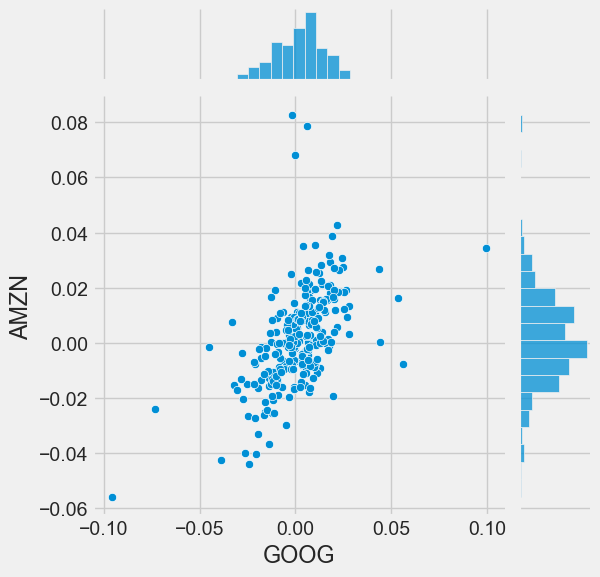

In [30]:
# We'll use joinplot to compare the daily returns of Google and NIVIDA
sns.jointplot(x='GOOG', y='AMZN', data=tech_rets, kind='scatter')

So now we can see that if two stocks are perfectly (and positivley) correlated with each other a linear relationship bewteen its daily return values should occur.

Seaborn and pandas make it very easy to repeat this comparison analysis for every possible combination of stocks in our technology stock ticker list. We can use sns.pairplot() to automatically create this plot

C:\Users\aidap\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


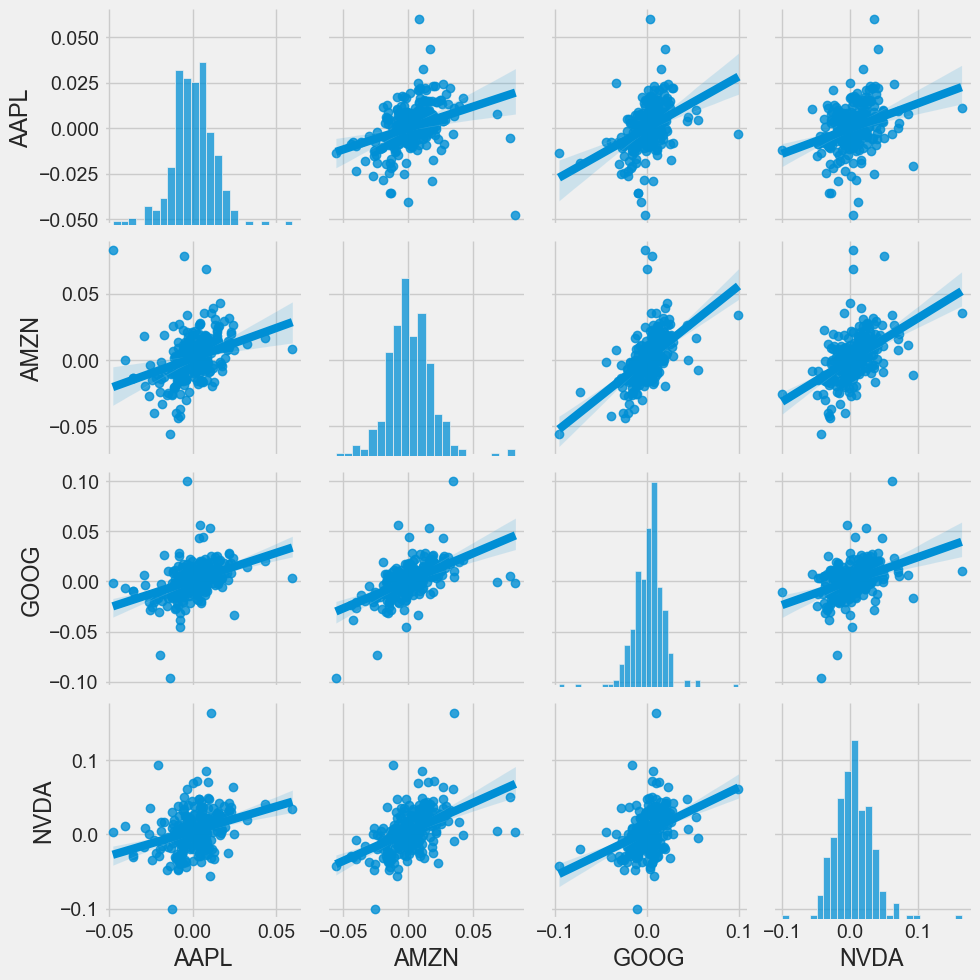

In [31]:
sns.pairplot(tech_rets, kind='reg')

Above we can see all the relationships on daily returns between all the stocks. A quick glance shows an interesting correlation between Google and Amazon daily returns. It might be interesting to investigate that individual comaprison.

While the simplicity of just calling sns.pairplot() is fantastic we can also use sns.PairGrid() for full control of the figure, including what kind of plots go in the diagonal, the upper triangle, and the lower triangle. Below is an example of utilizing the full power of seaborn to achieve this result.

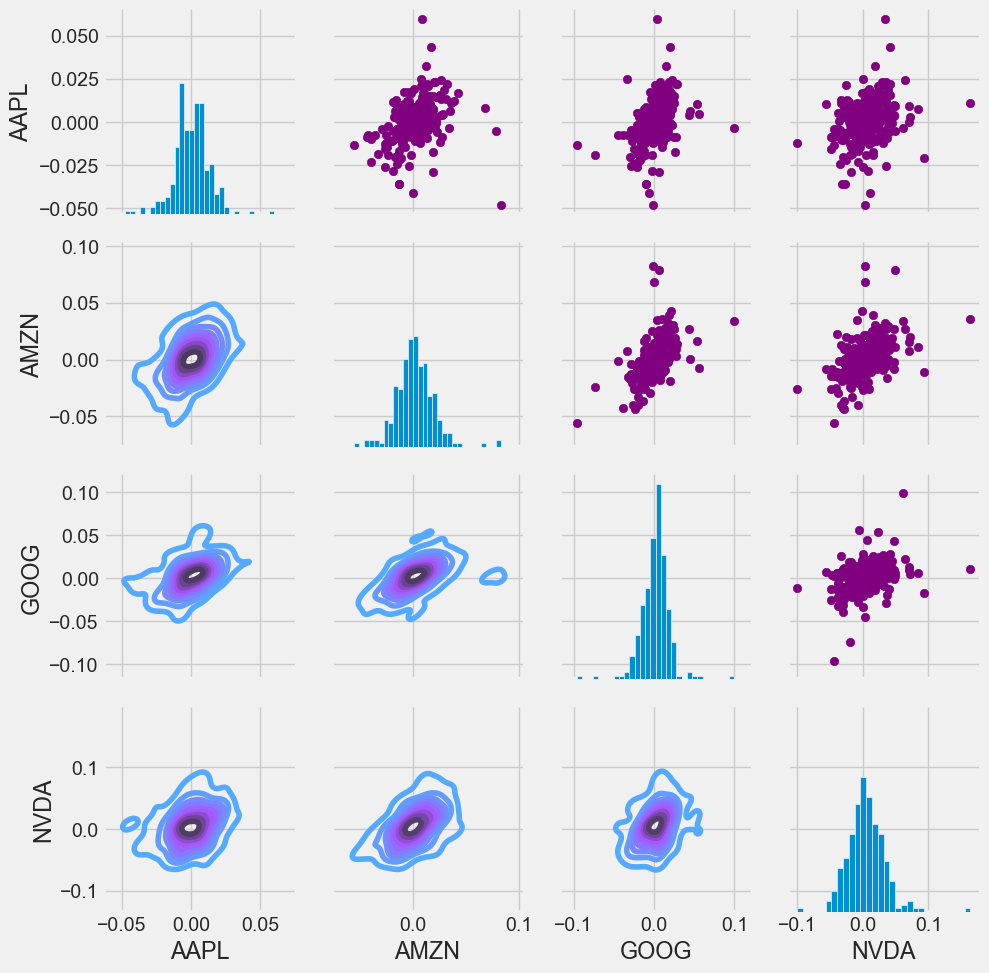

In [32]:
# Set up our figure by naming it returns_fig, call PairPLot on the DataFrame
return_fig = sns.PairGrid(tech_rets.dropna())

# Using map_upper we can specify what the upper triangle will look like.
return_fig.map_upper(plt.scatter, color='purple')

# We can also define the lower triangle in the figure, inclufing the plot type (kde) 
# or the color map (BluePurple)
return_fig.map_lower(sns.kdeplot, cmap='cool_d')

# Finally we'll define the diagonal as a series of histogram plots of the daily return
return_fig.map_diag(plt.hist, bins=30)

Finally, we could also do a correlation plot, to get actual numerical values for the correlation between the stocks' daily return values. By comparing the closing prices, we see an interesting relationship between Microsoft and Apple.

Text(0.5, 1.0, 'Correlation of stock closing price')

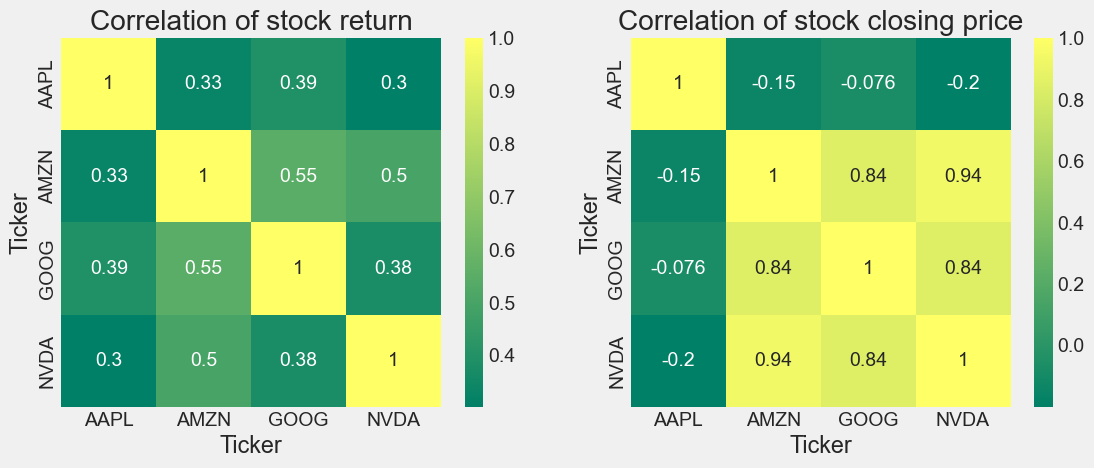

In [33]:
plt.figure(figsize=(12, 10))

plt.subplot(2, 2, 1)
sns.heatmap(tech_rets.corr(), annot=True, cmap='summer')
plt.title('Correlation of stock return')

plt.subplot(2, 2, 2)
sns.heatmap(closing_df.corr(), annot=True, cmap='summer')
plt.title('Correlation of stock closing price')

Just like we suspected in our PairPlot we see here numerically and visually that Microsoft and Amazon had the strongest correlation of daily stock return. It's also interesting to see that all the technology comapnies are positively correlated.

### 5. How much value do we put at risk by investing in a particular stock?
There are many ways we can quantify risk, one of the most basic ways using the information we've gathered on daily percentage returns is by comparing the expected return with the standard deviation of the daily returns.

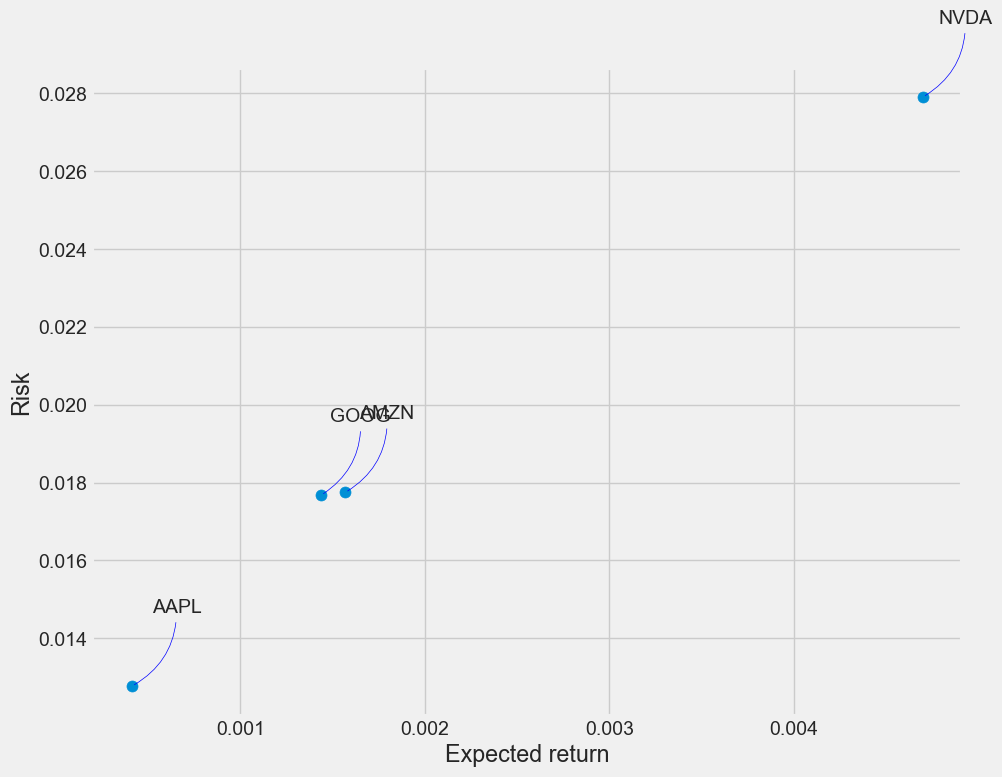

In [35]:
rets = tech_rets.dropna()

area = np.pi * 20

plt.figure(figsize=(10, 8))
plt.scatter(rets.mean(), rets.std(), s=area)
plt.xlabel('Expected return')
plt.ylabel('Risk')

for label, x, y in zip(rets.columns, rets.mean(), rets.std()):
    plt.annotate(label, xy=(x, y), xytext=(50, 50), textcoords='offset points', ha='right', va='bottom', 
                 arrowprops=dict(arrowstyle='-', color='blue', connectionstyle='arc3,rad=-0.3'))

In [38]:
# Define a function to calculate VaR
def calculate_var(daily_returns, confidence_level=0.95):
    sorted_returns = np.sort(daily_returns.dropna())
    var_index = int((1 - confidence_level) * len(sorted_returns))
    var_value = sorted_returns[var_index]
    return var_value

# Calculate VaR for each stock at 95% confidence level
confidence_level = 0.95
var_results = {}

for company, name in zip(company_list, tech_list):
    var_value = calculate_var(company['Daily Return'], confidence_level)
    var_results[name] = var_value

# Print the results
for stock, var in var_results.items():
    print(f"VaR at {confidence_level*100}% confidence level for {stock}: {var:.4f}")

VaR at 95.0% confidence level for AAPL: -0.0200
VaR at 95.0% confidence level for GOOG: -0.0246
VaR at 95.0% confidence level for NVDA: -0.0369
VaR at 95.0% confidence level for AMZN: -0.0254


In [39]:
investment = 100000
for stock, var in var_results.items():
    var_dollar = investment * var
    print(f"Value at Risk for ${investment} investment in {stock}: ${var_dollar:.2f}")

Value at Risk for $100000 investment in AAPL: $-1999.21
Value at Risk for $100000 investment in GOOG: $-2464.17
Value at Risk for $100000 investment in NVDA: $-3687.94
Value at Risk for $100000 investment in AMZN: $-2540.50
